# Coursera ML Ex1 - Multivariate Linear Regression
## 1. Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## 2. Define constants

In [2]:
# training dataset
DATA_FILE_NAME = './ex1data2.csv'
# gradient descent max step 
INTERATIONS = 1500
# learning rate
ALPHA = 0.01

## 3. Normalization

In [3]:
def normalizer(X, mu, sigma):
    return (X - mu) / sigma

## 4. Scale features

In [4]:
def scale_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = normalizer(X, mu, sigma)
    return X, mu, sigma

## 5. Cost function

In [5]:
def compute_cost(X, y, theta):
    # number of training examples
    m = y.size
    # cost
    j = np.sum((np.dot(X, theta) - y) ** 2)
    j /= (2*m)
    return j

## 6. Gradient Descent

In [6]:
def gradient_descent(X, y, theta, alpha, num_inters):
    # number of training examples
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = np.dot(np.dot(X, theta) - y, X) / m
        theta -= alpha * delta
        jHistory[i] = compute_cost(X, y, theta)
    
    return theta, jHistory

## 7. Load training dataset

In [7]:
df = pd.read_csv(DATA_FILE_NAME)
# extract X,y
X = df.values[:,0:2]
y = df.values[:,2]
m = y.size # number of training examples

# scalce features
x = X[0, 0]
X, mu, sigma = scale_features(X)

# add X_0 to X
X = np.concatenate((np.ones((m,1)), X), axis=1)

## 8. Learn parameters

[ 340412.56301439  109370.05670466   -6500.61509507]


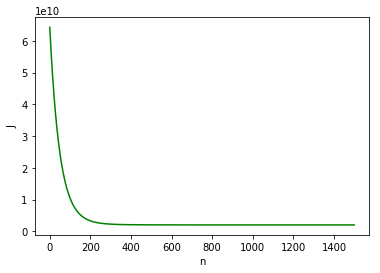

In [8]:
theta, jHistory = gradient_descent(X, y, np.zeros(X.shape[1]), ALPHA, INTERATIONS)
print(theta)
# plot J
plt.plot(range(jHistory.size), jHistory, color='g')
plt.xlabel('n'); plt.ylabel('J'); plt.show()

## 9. Predict

In [9]:
# predict for 1650, 3
x = normalizer(np.array([1650, 3]), mu, sigma)
print(np.dot(np.insert(x, 0, 1), theta))

293098.466676
